In [1]:
#importing basic libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
#checking missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [10]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Exited Count')

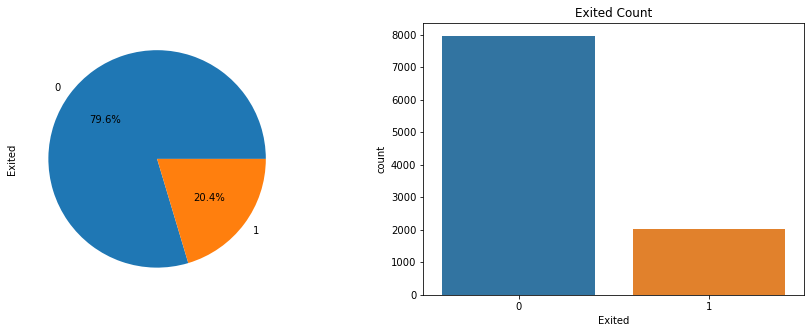

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Exited'])
plt.title('Exited Count')

In [12]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

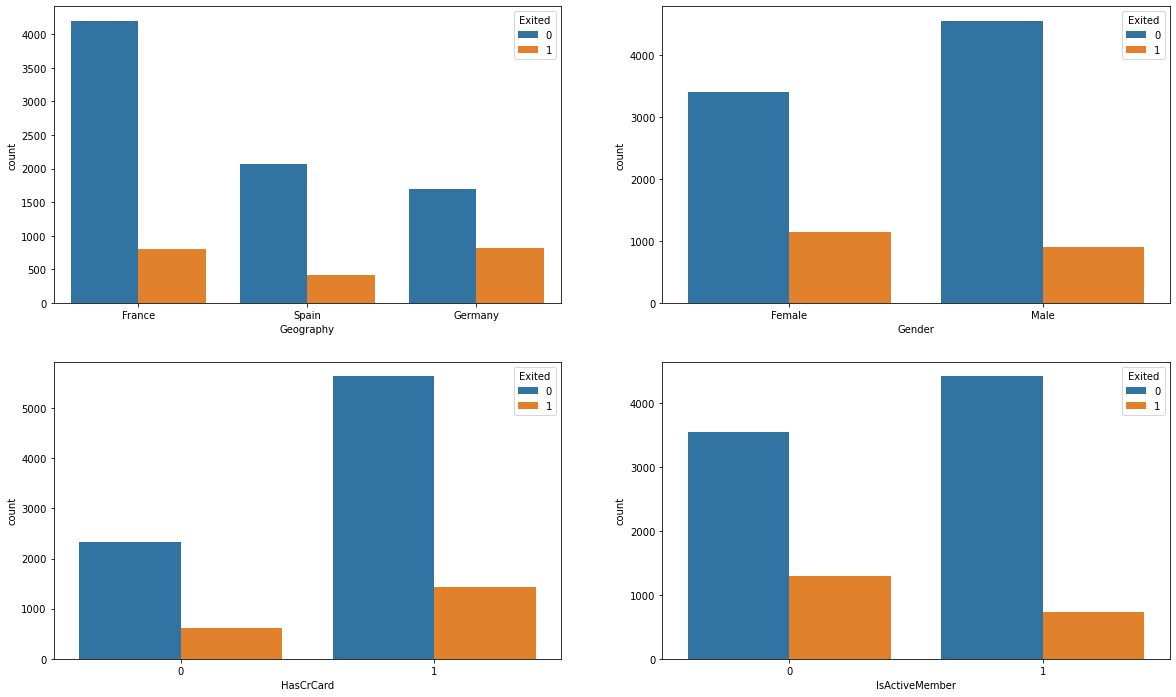

In [13]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

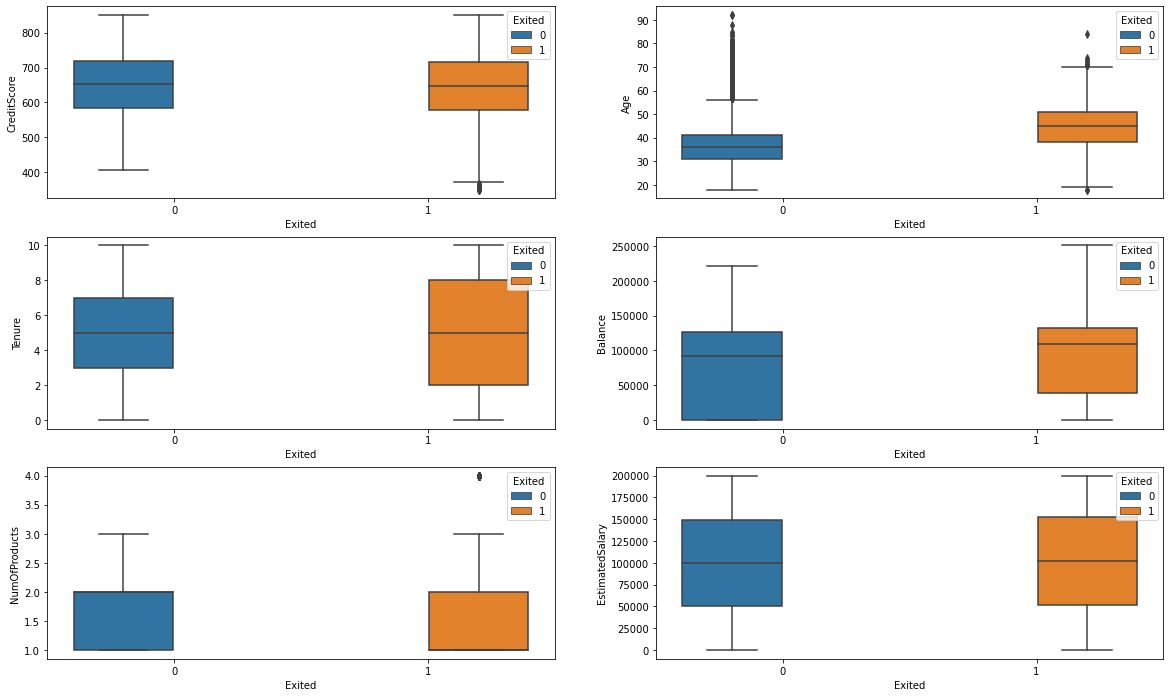

In [14]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

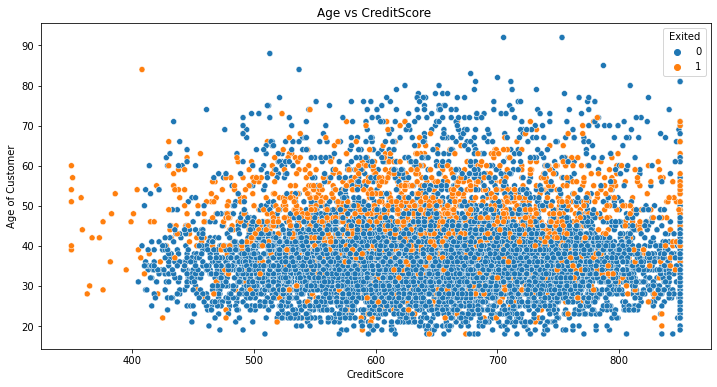

In [15]:
plt.figure(figsize=(12,6))

sns.scatterplot(df['CreditScore'],df['Age'], hue=df['Exited'])
plt.title('Age vs CreditScore ')
plt.xlabel('CreditScore')
plt.ylabel('Age of Customer')
plt.show()

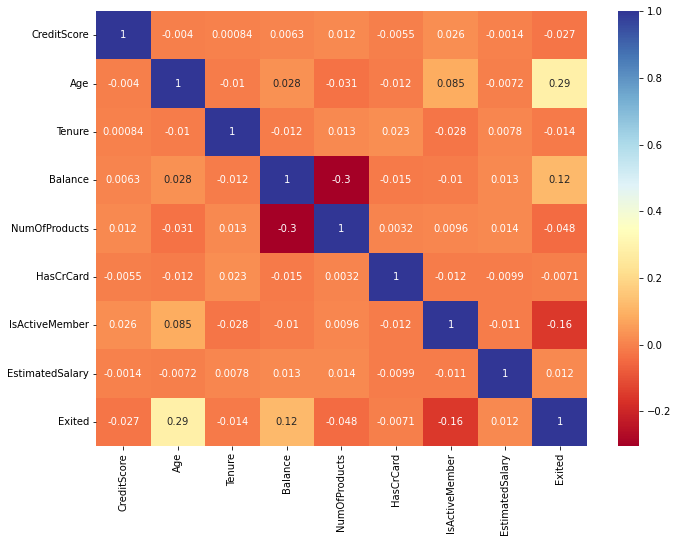

In [16]:
plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()



In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Geography"] = encoder.fit_transform(df["Geography"])
df["Gender"] = encoder.fit_transform(df["Gender"])

In [18]:
df.skew()

CreditScore       -0.071607
Geography          0.500916
Gender            -0.183596
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [20]:
#separating dependent and independent variables
x=df.copy()
x.drop('Exited',axis=1,inplace=True)
y=df['Exited']

In [21]:
#handling imbalance data
#Over Sampling the data using SMOTE
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [22]:
x,y=over.fit_resample(x,y)

1    7963
0    7963
Name: Exited, dtype: int64

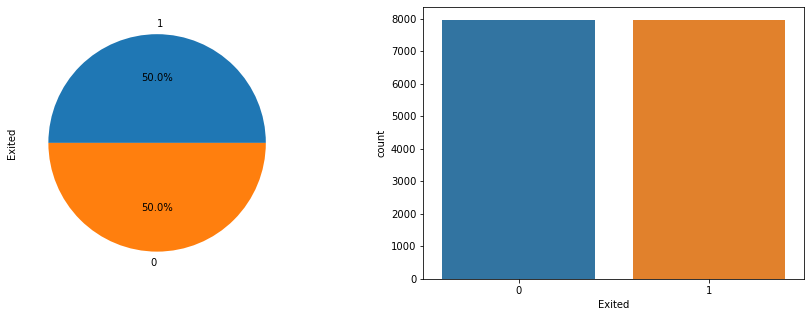

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()

In [24]:
#Scaling the data using MinMaxScaler scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [25]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [26]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [27]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr=LogisticRegression()

In [30]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [31]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(lr.score(xtest,ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, lr.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, lr.predict(xtest))))

Test Result:

accuracy score: 0.7750
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      2372
           1       0.78      0.78      0.78      2406

    accuracy                           0.78      4778
   macro avg       0.77      0.78      0.77      4778
weighted avg       0.78      0.78      0.78      4778


Confusion Matrix: 
 [[1835  537]
 [ 538 1868]]



# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(knn.score(xtest,ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, knn.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, knn.predict(xtest))))

Test Result:

accuracy score: 0.8108
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      2372
           1       0.81      0.82      0.81      2406

    accuracy                           0.81      4778
   macro avg       0.81      0.81      0.81      4778
weighted avg       0.81      0.81      0.81      4778


Confusion Matrix: 
 [[1896  476]
 [ 428 1978]]



# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(nb.score(xtest,ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, nb.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, nb.predict(xtest))))

Test Result:

accuracy score: 0.8012
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2372
           1       0.81      0.79      0.80      2406

    accuracy                           0.80      4778
   macro avg       0.80      0.80      0.80      4778
weighted avg       0.80      0.80      0.80      4778


Confusion Matrix: 
 [[1930  442]
 [ 508 1898]]



# SVM

In [34]:
from sklearn.svm import SVC
svm=SVC(probability=True)
svm.fit(xtrain,ytrain)
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(svm.score(xtest,ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, svm.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, svm.predict(xtest))))

Test Result:

accuracy score: 0.8238
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      2372
           1       0.85      0.79      0.82      2406

    accuracy                           0.82      4778
   macro avg       0.83      0.82      0.82      4778
weighted avg       0.83      0.82      0.82      4778


Confusion Matrix: 
 [[2035  337]
 [ 505 1901]]



# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(dt.score(xtest,ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, dt.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, dt.predict(xtest))))

Test Result:

accuracy score: 0.7941
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      2372
           1       0.79      0.81      0.80      2406

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778


Confusion Matrix: 
 [[1836  536]
 [ 448 1958]]



# Bagged Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
clf = DecisionTreeClassifier(random_state=42)
clf = DecisionTreeClassifier(random_state=42)
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=5000,
                            bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(xtrain, ytrain)
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(bag_clf.score(xtest,ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, bag_clf.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, bag_clf.predict(xtest)))) 

Test Result:

accuracy score: 0.8535
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2372
           1       0.85      0.86      0.86      2406

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778


Confusion Matrix: 
 [[2003  369]
 [ 331 2075]]



# Random Forest 

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=30)
rf_clf.fit(xtrain, ytrain)
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(rf_clf.score(xtest, ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, rf_clf.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, rf_clf.predict(xtest))))


Test Result:

accuracy score: 0.8543
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      2372
           1       0.87      0.83      0.85      2406

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778


Confusion Matrix: 
 [[2073  299]
 [ 397 2009]]



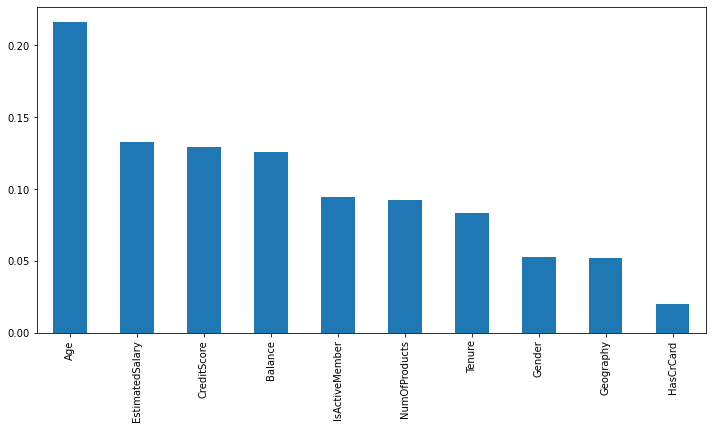

In [38]:
pd.Series(rf_clf.feature_importances_, 
         index=xtrain.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# Extra Trees

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
xt_clf = ExtraTreesClassifier(random_state=42)
xt_clf.fit(xtrain, ytrain)
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(xt_clf.score(xtest, ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, xt_clf.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, xt_clf.predict(xtest)))) 


Test Result:

accuracy score: 0.8560
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      2372
           1       0.86      0.86      0.86      2406

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778


Confusion Matrix: 
 [[2027  345]
 [ 343 2063]]



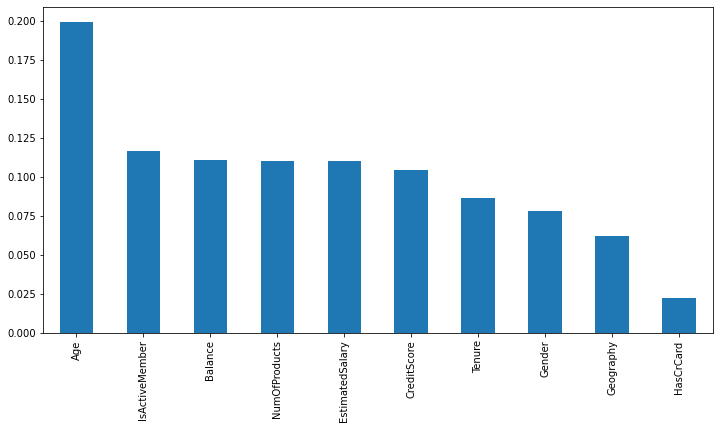

In [40]:
pd.Series(xt_clf.feature_importances_, 
         index=xtrain.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
ada_clf.fit(xtrain, ytrain)
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(ada_clf.score(xtest, ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, ada_clf.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, ada_clf.predict(xtest)))) 

Test Result:

accuracy score: 0.8244
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      2372
           1       0.82      0.83      0.83      2406

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778


Confusion Matrix: 
 [[1943  429]
 [ 410 1996]]



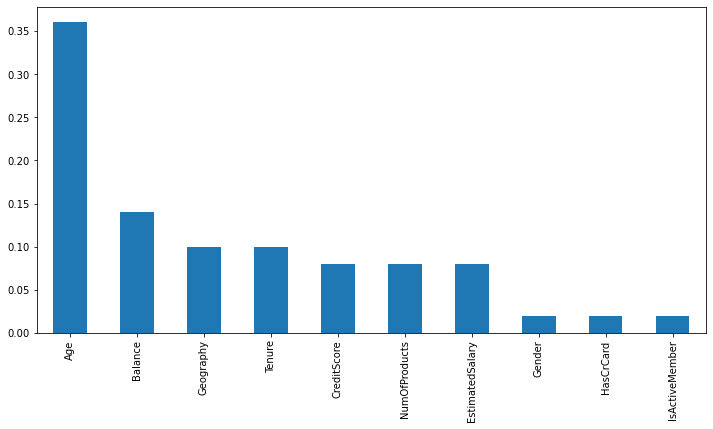

In [42]:
pd.Series(ada_clf.feature_importances_, 
         index=xtrain.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(xtrain, ytrain)
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(gbc_clf.score(xtest, ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, gbc_clf.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, gbc_clf.predict(xtest)))) 

Test Result:

accuracy score: 0.8420
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      2372
           1       0.85      0.84      0.84      2406

    accuracy                           0.84      4778
   macro avg       0.84      0.84      0.84      4778
weighted avg       0.84      0.84      0.84      4778


Confusion Matrix: 
 [[2012  360]
 [ 395 2011]]



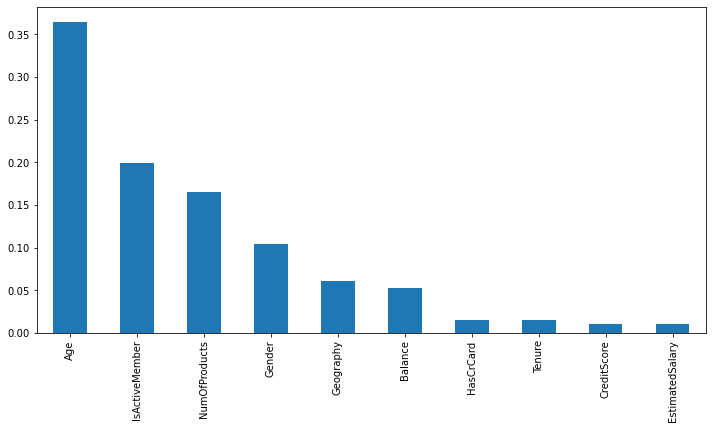

In [44]:
pd.Series(gbc_clf.feature_importances_, 
         index=xtrain.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# Voting Classifier

In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


vc = VotingClassifier(
    estimators=[('lr', LogisticRegression()), 
                ('knn', KNeighborsClassifier()), 
                ('gnb', GaussianNB())], 
    voting='hard')
vc.fit(xtrain, ytrain)
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(vc.score(xtrain, ytrain)))
print("Classification Report: \n {}\n".format(classification_report(ytest, vc.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, vc.predict(xtest)))) 

Test Result:

accuracy score: 0.8053
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2372
           1       0.81      0.79      0.80      2406

    accuracy                           0.80      4778
   macro avg       0.80      0.80      0.80      4778
weighted avg       0.80      0.80      0.80      4778


Confusion Matrix: 
 [[1927  445]
 [ 502 1904]]



# Model Accuracies

In [46]:
bag_cf1=bag_clf.score(xtest, ytest)*100
rf_cf1=rf_clf.score(xtest, ytest)*100
xt_cf1=xt_clf.score(xtest, ytest)*100
ada_cf1=ada_clf.score(xtest, ytest)*100
gbc_cf1=gbc_clf.score(xtest, ytest)*100
v_cf1=vc.score(xtrain, ytrain)*100

lr1=lr.score(xtest,ytest)*100
knn1=knn.score(xtest,ytest)*100
nb1=nb.score(xtest,ytest)*100
svc1=svm.score(xtest,ytest)*100
dt1=dt.score(xtest,ytest)*100

In [47]:
accuracy=[bag_cf1,rf_cf1,xt_cf1,ada_cf1,gbc_cf1,v_cf1]
classifiers=['Bagged Decision Tree','Random Forest Classifier','Extra Tree Classifier','AdaBoost', 'Gradient Boosting','Voting Classifier']

In [48]:
accuracy1=[lr1,knn1,nb1,svc1,dt1]
classifiers1=['Logistic Regression','KNN','Naive Bayes','SVC', 'Decision Tree']

In [49]:
models_acc_df1 = pd.DataFrame()
models_acc_df1['Models'] = classifiers1
models_acc_df1['Accuracy'] = accuracy1
models_acc_df1

,Models,Accuracy
0,Logistic Regression,77.501046
1,KNN,81.079950
2,Naive Bayes,80.117204
3,SVC,82.377564
4,Decision Tree,79.405609


In [50]:
models_acc_df = pd.DataFrame()
models_acc_df['Models'] = classifiers
models_acc_df['Accuracy'] = accuracy
models_acc_df

,Models,Accuracy
0,Bagged Decision Tree,85.349519
1,Random Forest Classifier,85.433236
2,Extra Tree Classifier,85.600670
3,AdaBoost,82.440352
4,Gradient Boosting,84.198409
5,Voting Classifier,80.534625


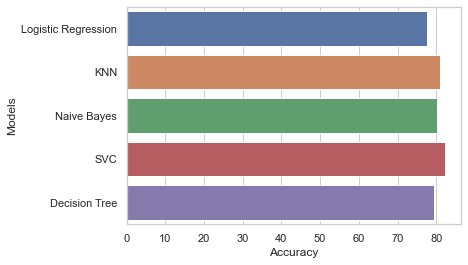

In [51]:
sns.set(style='whitegrid')
ax=sns.barplot(y="Models",x="Accuracy",data=models_acc_df1)

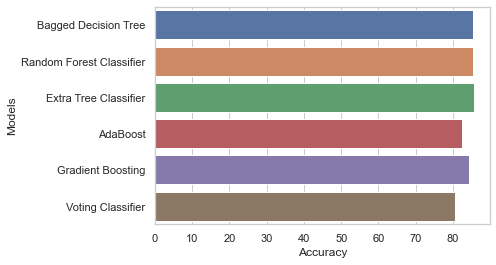

In [52]:
sns.set(style='whitegrid')
ax=sns.barplot(y="Models",x="Accuracy",data=models_acc_df)

In [53]:
import joblib

In [54]:
filename = 'mbxt.sav'

In [55]:
joblib.dump(xt_clf, open(filename, 'wb'))